- importing the necessary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [22]:
data=pd.read_csv("DiamondPricesData.csv")

In [23]:
data.describe()

,price,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


- checking the data types of each variable

In [24]:
data.dtypes

price        int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

- checking for duplicated values

In [25]:
data.duplicated().sum()

np.int64(146)

- checking for missing values

In [26]:
data.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

- Categorizing the data into continuous and categorical data

In [27]:
cont_data=data.select_dtypes(exclude=['object'])
cont_data

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,2757,0.72,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,61.0,58.0,6.15,6.12,3.74


In [28]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


-we are going to impute for missing values in the continuous variable "depth" and first visualize it to find out the kind of distribution

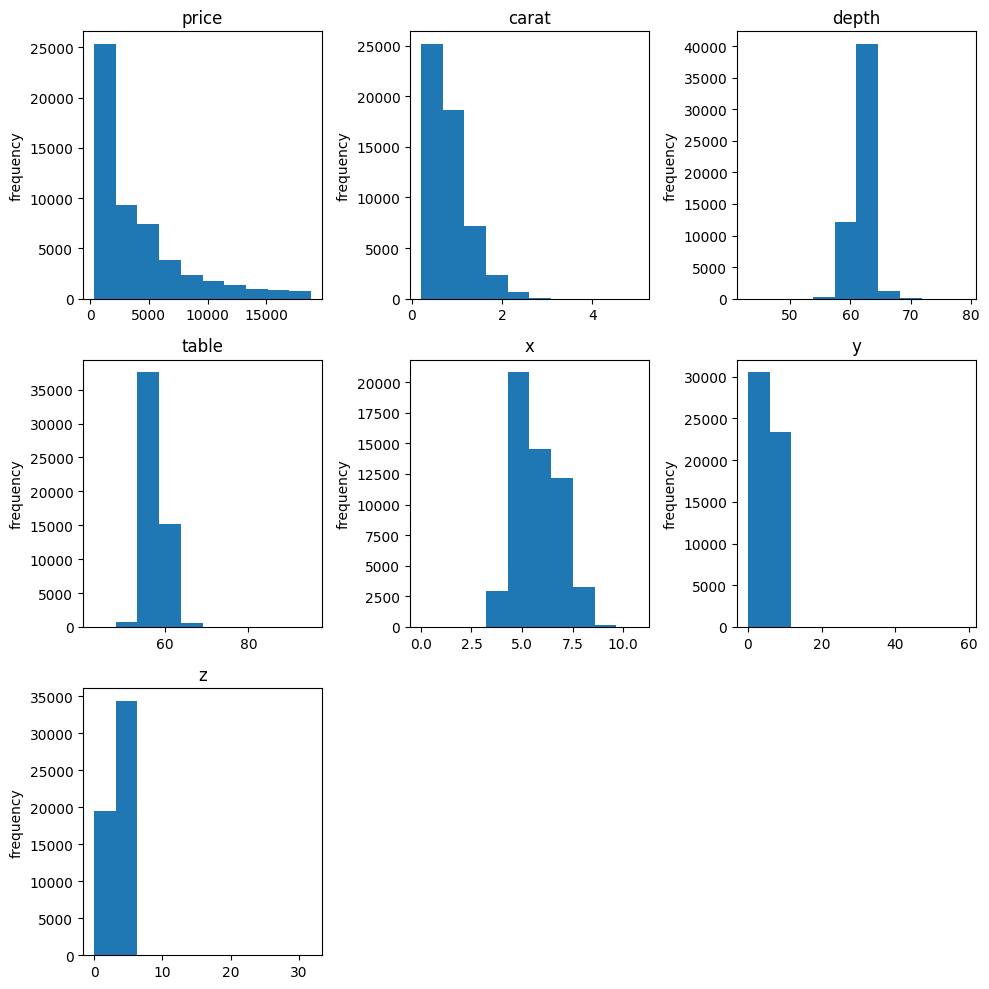

In [29]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(cont_data[col])
    plt.title(col)
    plt.ylabel("frequency")
plt.tight_layout()
plt.show()

- imputing for the missing values of depth

In [30]:
data["depth"]=data["depth"].fillna(data["depth"].mean())

- imputing for the missing values of "color"

In [32]:
data["color"]=data["color"].fillna(data["color"].mode()[0])

In [33]:
data.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

- displaying an outliers in the data

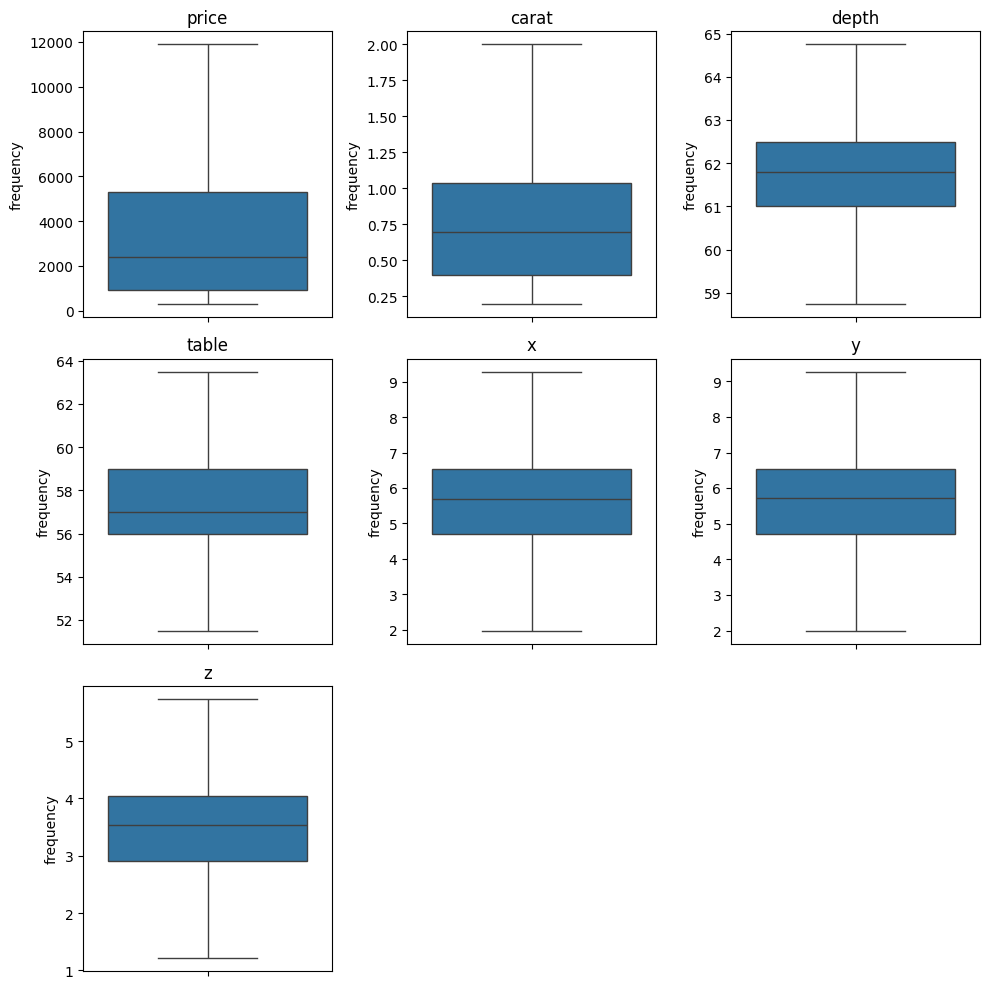

In [44]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(cont_data[col])
    plt.title(col)
    plt.ylabel("frequency")
plt.tight_layout()
plt.show()

- Removing outliers

In [39]:
def remove_outliers(columns):
    for column in columns:

        upper_quartile=cont_data[column].quantile(.75)
        lower_quartile=cont_data[column].quantile(.25)

        IQR = upper_quartile - lower_quartile

        upper_boundary = upper_quartile + 1.5 * IQR
        lower_boundary = lower_quartile - 1.5 * IQR

        cont_data[column]= np.where(cont_data[column]>upper_boundary,upper_boundary,cont_data[column])
        cont_data[column]= np.where(cont_data[column]<lower_boundary,lower_boundary,cont_data[column])

In [40]:
remove_outliers(cont_data)

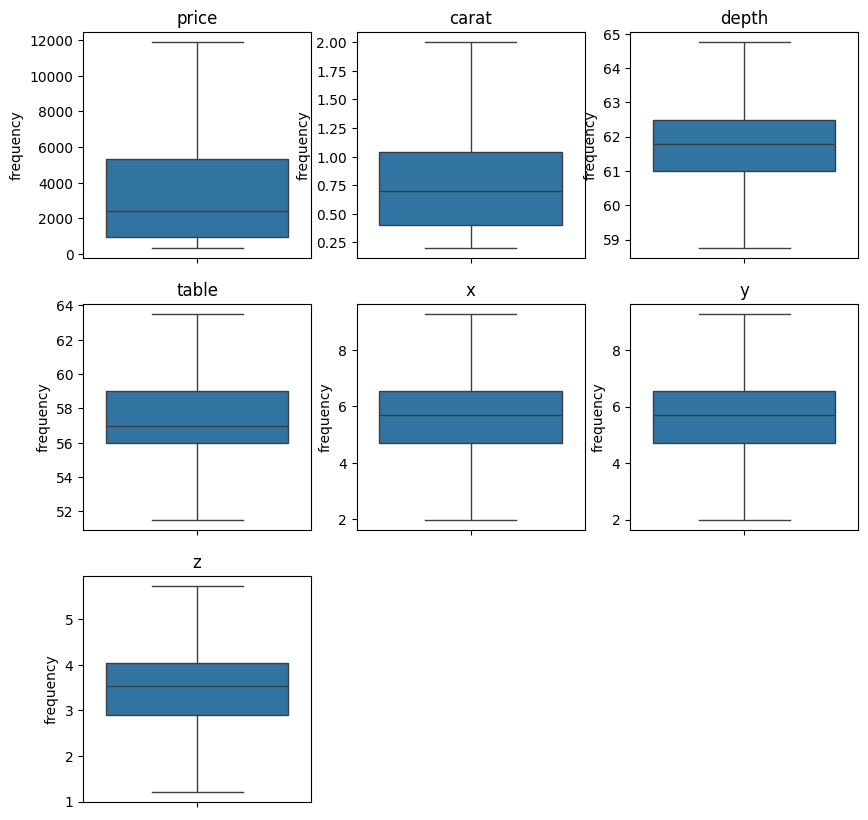

In [45]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(cont_data[col])
    plt.title(col)
    plt.ylabel("frequency")
plt.tight_layout
plt.show()

<Axes: >

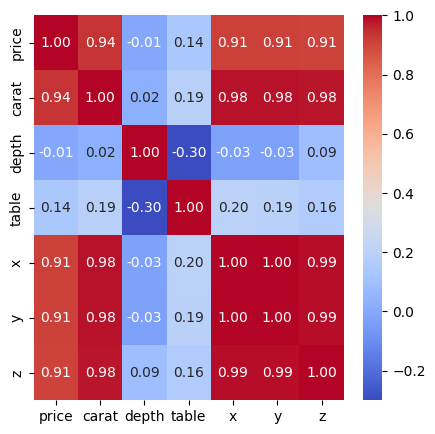

In [46]:
corr_matrix=cont_data.corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')

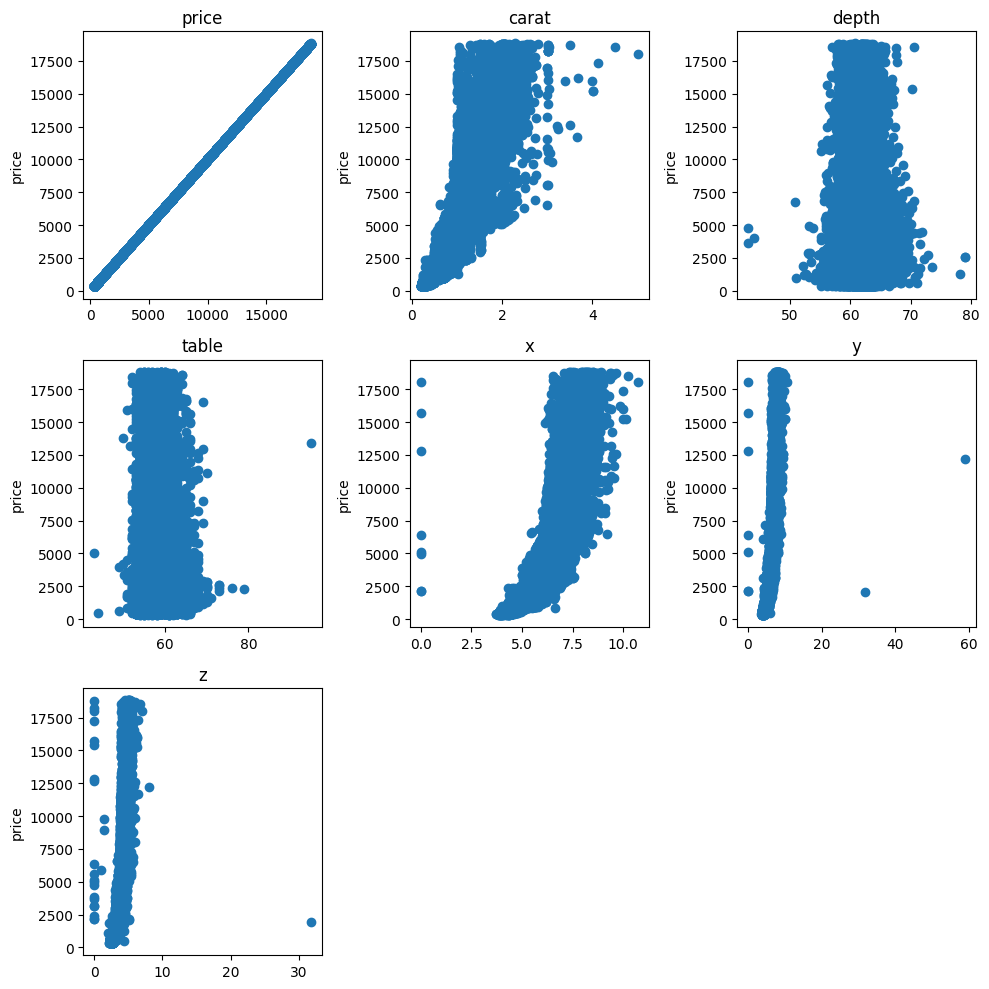

In [55]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3,i+1)
    plt.scatter(y=data['price'],x=data[col])
    plt.title(col)
    plt.ylabel("price")
plt.tight_layout()
plt.show()

In [62]:
from scipy.stats import f_oneway
def combined_boxplots(data,var1,var2):
    plt.figure(figsize=(10,10))
    sns.boxplot(x=data[var1],y=data[var2])
    plt.xlabel(f"{var1}")
    plt.ylabel(f"{var2}")
    plt.title(f"Boxplot of {var1} vs {var2}")
    plt.show()

def Anova_test(data,var1,var2):
    group_data=[
        group[var1].values for _, group in data.groupby(var2)
    ]
    f_stats,p_value =f_oneway(*group_data)

    if p_value > 0.05:
        print(f"{var1} is not significantly correlated with {var2}")
    else:
        print(f"{var1} is significantly correlated with {var2}")



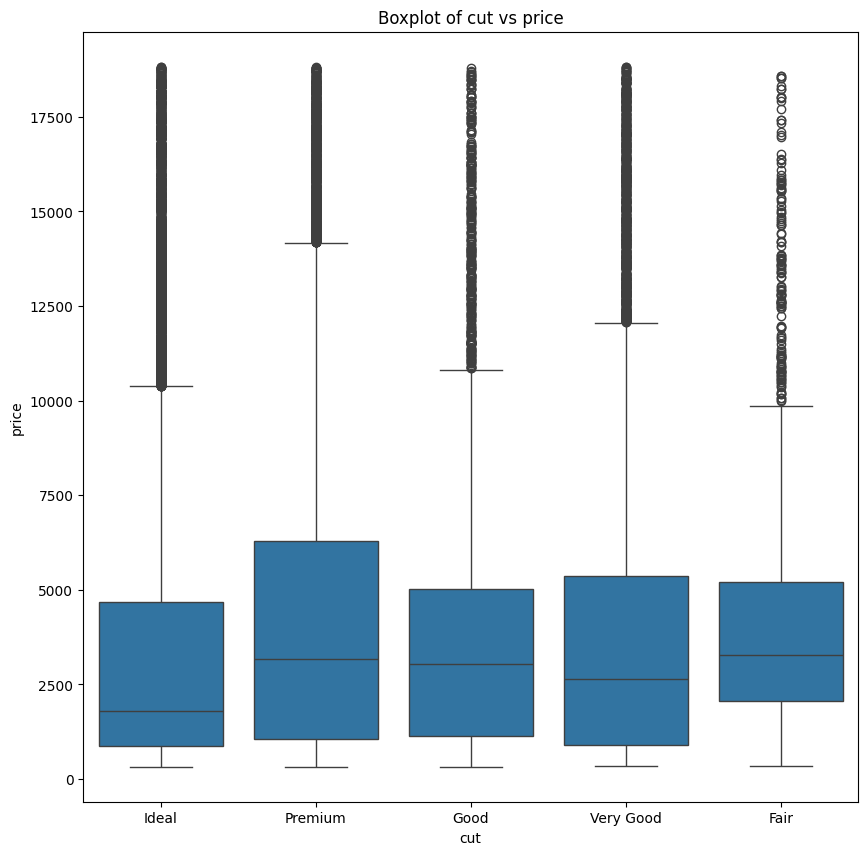

price is significantly correlated with cut


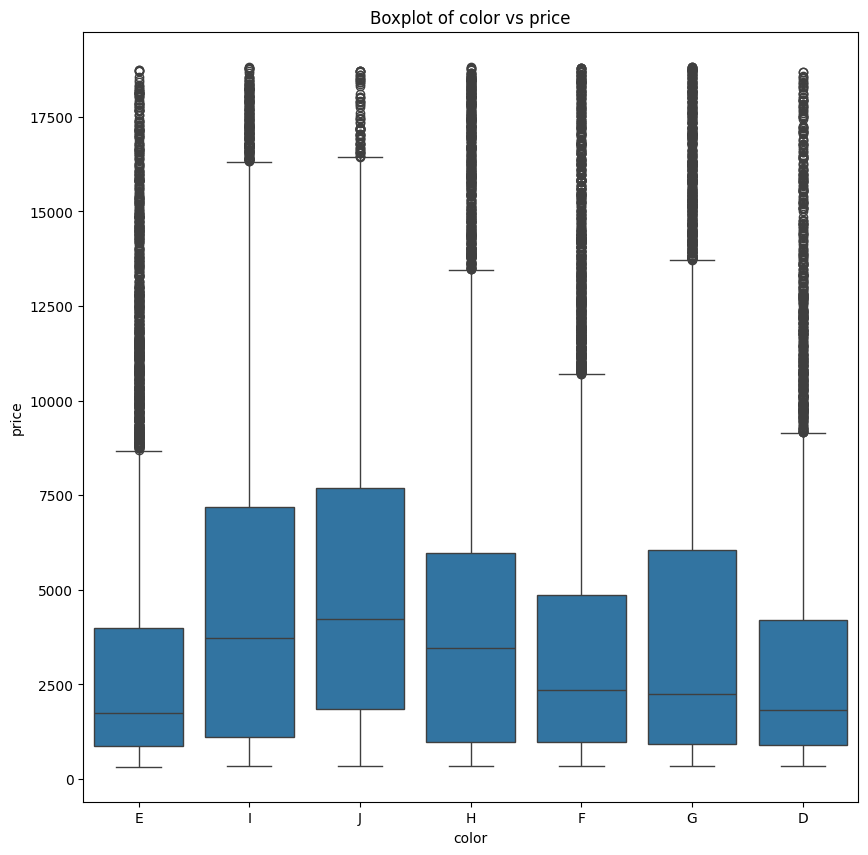

price is significantly correlated with color


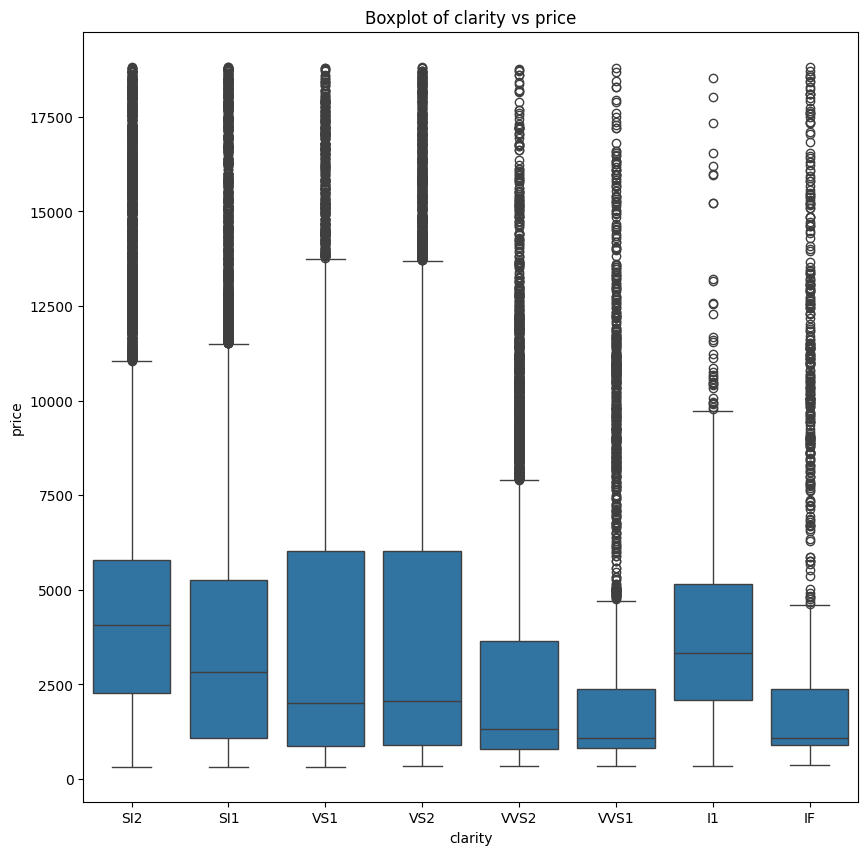

price is significantly correlated with clarity


In [63]:
for i in cat_data.columns:
    combined_boxplots(data, i, 'price')
    Anova_test(data,'price',i)